In [5]:
print("Welcome to machine learning with python")


Welcome to machine learning with python
Welcome to machine learning with python


In [6]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2018-11-01 15:49:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... --2018-11-01 15:49:37--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: 'loan_train.csv'

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0.001s  

20

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing

In [8]:
#read data from csv file
df= pd.read_csv("loan_train.csv")

In [9]:
#preporcessing: feature selection/extraction
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df['dayofweek'] = df['effective_date'].dt.dayofweek
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [10]:
#convert categorical values to numerical
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
#define feature set X and Y
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
x= Feature
x=preprocessing.StandardScaler().fit(x).transform(x.astype(float))
y = df['loan_status'].values
x.shape
y.shape


(346,)

(346,)

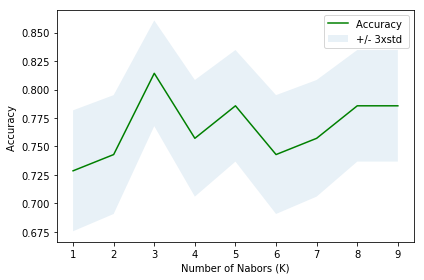

The best accuracy was with 0.814285714286 with k= 3


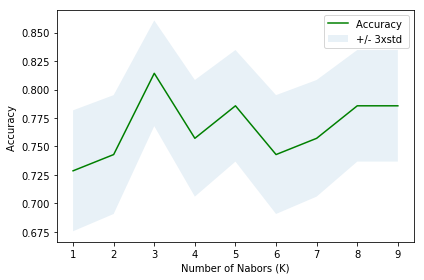

The best accuracy was with 0.814285714286 with k= 3


In [12]:
#KNN
#Train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=10)

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
ks=10
mean_acc= np.zeros(ks-1)
std_acc= np.zeros(ks-1)
ConfusionMx= []
for n in range(1,ks):
    #train the model and predict
    neigh= KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train)
    y_hat= neigh.predict(x_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test, y_hat)
    std_acc[n-1]= np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])

#Plot model accuracy for different number of k
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [13]:
# so the best accuracy at k=3
#let training the with k=3 and evaluate the result
#the best value of k is 3
neigh= KNeighborsClassifier(n_neighbors = 3).fit(x_train,y_train)
y_hat= neigh.predict(x_test)

In [14]:
#Decision tree
x_trainset, x_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.22, random_state=10)
from sklearn.tree import DecisionTreeClassifier
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 3)
drugTree.fit(x_trainset,y_trainset)
y_hatdt = drugTree.predict(x_testset)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, y_hatdt))
from sklearn.metrics import jaccard_similarity_score
#print("jaccard_similarity_score: ",jaccard_similarity_score(y_testset, y_hatdt))
from sklearn.metrics import f1_score
#print(f1_score(y_testset, y_hatdt, average='weighted'))

DecisionTrees's Accuracy:  0.818181818182
DecisionTrees's Accuracy:  0.818181818182


In [16]:
#Logistic regression

x_trainlog,x_testlog,y_trainlog,y_testlog= train_test_split(x,y,test_size=0.2, random_state=10)
print ('Train set:', x_trainlog.shape,  y_trainlog.shape)
print ('Test set:', x_testlog.shape,  y_testlog.shape)
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_trainlog,y_trainlog)
yhatlog=LR.predict(x_testlog)
yhat_prob = LR.predict_proba(x_testlog)

print("Logistic regression Jaccard similarity score: ",jaccard_similarity_score(y_testlog, yhatlog))
from sklearn.metrics import log_loss
print("Logistic regression log_loss: ",log_loss(y_testlog, yhat_prob))
print("Logistic regression f1_score: ",f1_score(y_testlog, yhatlog, average='weighted'))

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
Logistic regression Jaccard similarity score:  0.8
Logistic regression log_loss:  0.527562061763
Logistic regression f1_score:  0.711111111111


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Train set: (276, 8) (276,)
Test set: (70, 8) (70,)
Logistic regression Jaccard similarity score:  0.8
Logistic regression log_loss:  0.527562061763
Logistic regression f1_score:  0.711111111111


/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [17]:
#SVM
X_trainsvm, X_testsvm, y_trainsvm, y_testsvm = train_test_split( x, y, test_size=0.2, random_state=13)
from sklearn import svm
#choice of kernel functions for performing its processing
clf = svm.SVC(kernel='rbf')
clf.fit(X_trainsvm, y_trainsvm) 
yhatsvm = clf.predict(X_testsvm)
#print("f1_score: ",f1_score(y_testsvm, yhatsvm, average='weighted'))
#print("jaccard_similarity_score: ",jaccard_similarity_score(y_testsvm, yhatsvm))

/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/ibm/conda/miniconda3/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


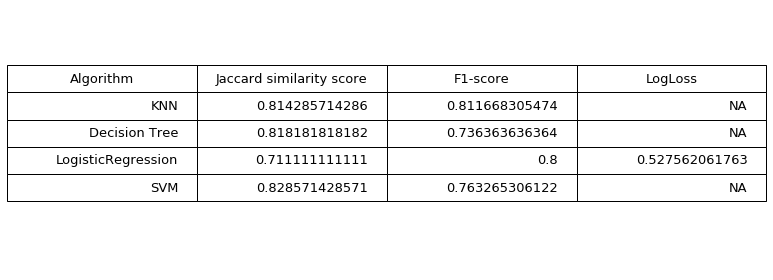

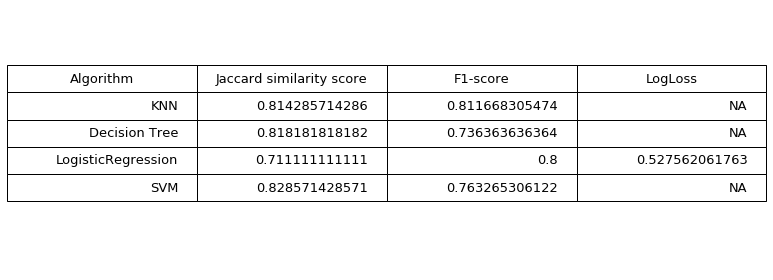

In [18]:
#report: evaluate all model
JaccardkNN=jaccard_similarity_score(y_test, y_hat)
F1ScorekNN= f1_score(y_test, y_hat, average='weighted')
JaccardDT=jaccard_similarity_score(y_testset, y_hatdt)
F1ScoreDT=f1_score(y_testset, y_hatdt, average='weighted')
F1ScoreLR=f1_score(y_testlog, yhatlog, average='weighted')
JaccardLR=jaccard_similarity_score(y_testlog, yhatlog)
logLR=log_loss(y_testlog, yhat_prob)
JaccardSVM=jaccard_similarity_score(y_testsvm, yhatsvm)
F1ScoreSVM=f1_score(y_testsvm, yhatsvm, average='weighted')
#make data report
data_report =np.array([['KNN',JaccardkNN ,F1ScorekNN,'NA'],['Decision Tree',JaccardDT,F1ScoreDT,'NA'], ['LogisticRegression',F1ScoreLR,JaccardLR, logLR],['SVM',JaccardSVM,F1ScoreSVM,'NA']
     ])

fig, ax = plt.subplots()
ax.axis('off')
#ax.axis('tight')
df = pd.DataFrame(data_report, columns=['Algorithm','Jaccard similarity score','F1-score','LogLoss'])
#put data report into table
report=ax.table(cellText=df.values, colLabels=df.columns, loc='center')
report.set_fontsize(24)
report.scale(2,2)
fig.tight_layout()